In [23]:
# imports
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
# Settings for displaying floats
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
df = pd.read_csv("./data/cleaned_data.csv")
df.head()

,Date,Country,City,aqi,co,d,dew,humidity,mepaqi,no2,...,pol,precipitation,pressure,psi,so2,temperature,uvi,wd,wind-gust,wind-speed
0,2014-12-29,AT,Vienna,NaN,0.10,NaN,NaN,NaN,NaN,9.00,...,NaN,NaN,NaN,NaN,2.60,NaN,NaN,NaN,NaN,NaN
1,2014-12-29,AU,Brisbane,NaN,1.90,NaN,NaN,NaN,NaN,4.60,...,NaN,NaN,NaN,NaN,1.10,NaN,NaN,NaN,NaN,NaN
2,2014-12-29,BE,Brussels,NaN,0.10,NaN,NaN,NaN,NaN,23.40,...,NaN,NaN,NaN,NaN,1.60,NaN,NaN,NaN,NaN,NaN
3,2014-12-29,BO,Cochabamba,NaN,NaN,NaN,NaN,NaN,NaN,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-29,BR,São Paulo,NaN,5.50,NaN,NaN,NaN,NaN,17.90,...,NaN,NaN,NaN,NaN,1.10,NaN,NaN,NaN,NaN,NaN


In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Split 'Date' column into 'year', 'month' and 'day'
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Remove 'Date' column
if 'Date' in df.columns:
    df.drop(columns=['Date'], inplace=True)


In [6]:
# Display the first 5 rows of the dataframe
df.head()

,Country,City,aqi,co,d,dew,humidity,mepaqi,no2,o3,...,psi,so2,temperature,uvi,wd,wind-gust,wind-speed,year,month,day
0,AT,Vienna,NaN,0.10,NaN,NaN,NaN,NaN,9.00,NaN,...,NaN,2.60,NaN,NaN,NaN,NaN,NaN,2014,12,29
1,AU,Brisbane,NaN,1.90,NaN,NaN,NaN,NaN,4.60,3.70,...,NaN,1.10,NaN,NaN,NaN,NaN,NaN,2014,12,29
2,BE,Brussels,NaN,0.10,NaN,NaN,NaN,NaN,23.40,2.90,...,NaN,1.60,NaN,NaN,NaN,NaN,NaN,2014,12,29
3,BO,Cochabamba,NaN,NaN,NaN,NaN,NaN,NaN,3.00,4.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,12,29
4,BR,São Paulo,NaN,5.50,NaN,NaN,NaN,NaN,17.90,19.50,...,NaN,1.10,NaN,NaN,NaN,NaN,NaN,2014,12,29


In [7]:
# Funktion für Übersicht über dtypes, missing values, unique values etc.
def overview(df):
    '''
    Erstelle einen Überblick über einige Eigenschaften der Spalten eines DataFrames.
    VARs
        df: Der zu betrachtende DataFrame
    RETURNS:
        None
    '''
    display(pd.DataFrame({'dtype': df.dtypes,
                          'total': df.count(),
                          'missing': df.isna().sum(),
                          'missing%': df.isna().mean()*100,
                          'n_uniques': df.nunique(),
                          'uniques%': df.nunique()/df.shape[0]*100,
                          'uniques': [df[col].unique() for col in df.columns]
                         }))


In [8]:
overview(df)

,dtype,total,missing,missing%,n_uniques,uniques%,uniques
Country,object,225860,0,0.00,95,0.04,"[AT, AU, BE, BO, BR, CA, CH, CL, CN, CO, CY, C..."
City,object,225860,0,0.00,95,0.04,"[Vienna, Brisbane, Brussels, Cochabamba, São P..."
aqi,float64,6268,219592,97.22,302,0.13,"[nan, 27.0, 28.0, 35.0, 50.0, 59.0, 52.0, 53.0..."
co,float64,133731,92129,40.79,508,0.22,"[0.1, 1.9, nan, 5.5, 4.2, 16.1, 5.1, 3.1, 2.2,..."
d,float64,272,225588,99.88,48,0.02,"[nan, -24.0, -26.0, -27.0, -25.0, 7.0, 0.0, -4..."
dew,float64,146267,79593,35.24,515,0.23,"[nan, 16.0, 14.0, 18.0, 1.0, 7.0, 4.0, 5.0, 20..."
humidity,float64,182043,43817,19.40,937,0.41,"[nan, 84.0, 76.5, 32.0, 22.0, 58.0, 76.0, 81.0..."
mepaqi,float64,2765,223095,98.78,809,0.36,"[nan, 81.0, 81.3, 48.2, 115.8, 59.5, 62.9, 62...."
no2,float64,158692,67168,29.74,683,0.30,"[9.0, 4.6, 23.4, 3.0, 17.9, 4.7, 4.4, 13.6, na..."
o3,float64,151424,74436,32.96,936,0.41,"[nan, 3.7, 2.9, 4.3, 19.5, 20.0, 10.6, 9.4, 21..."


In [9]:
missing_values = df.isna().mean() * 100  # Prozent der fehlenden Werte berechnen
missing_values_sorted = missing_values.sort_values(ascending=False)  # Nach aufsteigender Reihenfolge sortieren

print(missing_values_sorted)


d               99.88
psi             99.84
pol             99.59
mepaqi          98.78
pm1             98.54
aqi             97.22
uvi             95.80
precipitation   92.91
wd              92.72
wind-gust       52.97
co              40.79
dew             35.24
o3              32.96
so2             32.75
no2             29.74
pm10            25.68
wind-speed      21.23
pressure        19.44
humidity        19.40
temperature     19.39
pm25             8.66
month            0.00
year             0.00
Country          0.00
City             0.00
day              0.00
dtype: float64


In [15]:
# Berechnen, wie viele Prozent der Werte pro Spalte fehlen
missing_percent = df.isna().mean() * 100  

# Spalten auswählen, die weniger als 50% fehlende Werte haben
df_cleaned = df.loc[:, missing_percent <= 53]

# Ergebnis ausgeben
print(f"Anzahl der entfernten Spalten: {df.shape[1] - df_cleaned.shape[1]}")
print("Übrige Spalten:", df_cleaned.columns)

df_cleaned.head()

Anzahl der entfernten Spalten: 9
Übrige Spalten: Index(['Country', 'City', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25',
       'pressure', 'so2', 'temperature', 'wind-gust', 'wind-speed', 'year',
       'month', 'day'],
      dtype='object')


,Country,City,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed,year,month,day
0,AT,Vienna,0.10,NaN,NaN,9.00,NaN,20.00,65.00,NaN,2.60,NaN,NaN,NaN,2014,12,29
1,AU,Brisbane,1.90,NaN,NaN,4.60,3.70,11.00,20.00,NaN,1.10,NaN,NaN,NaN,2014,12,29
2,BE,Brussels,0.10,NaN,NaN,23.40,2.90,25.00,71.00,NaN,1.60,NaN,NaN,NaN,2014,12,29
3,BO,Cochabamba,NaN,NaN,NaN,3.00,4.30,25.00,NaN,NaN,NaN,NaN,NaN,NaN,2014,12,29
4,BR,São Paulo,5.50,NaN,NaN,17.90,19.50,20.00,50.00,NaN,1.10,NaN,NaN,NaN,2014,12,29


In [16]:
df_cleaned.shape

(225860, 17)

In [17]:
missing_values_df_cleaned = df_cleaned.isna().mean() * 100  # Prozent der fehlenden Werte berechnen
missing_values_df_cleaned_sorted = missing_values_df_cleaned.sort_values(ascending=False)  # Nach aufsteigender Reihenfolge sortieren

print(missing_values_df_cleaned_sorted)

wind-gust     52.97
co            40.79
dew           35.24
o3            32.96
so2           32.75
no2           29.74
pm10          25.68
wind-speed    21.23
pressure      19.44
humidity      19.40
temperature   19.39
pm25           8.66
year           0.00
month          0.00
Country        0.00
City           0.00
day            0.00
dtype: float64


In [19]:
df = df_cleaned
df.describe()

,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed,year,month,day
count,"133,731.00","146,267.00","182,043.00","158,692.00","151,424.00","167,860.00","206,309.00","181,945.00","151,886.00","182,062.00","106,220.00","177,904.00","225,860.00","225,860.00","225,860.00"
mean,4.31,10.44,67.67,10.63,18.11,28.38,60.87,998.36,3.37,16.97,6.68,2.85,"2,020.52",5.93,15.71
std,6.63,9.71,20.27,9.48,11.83,29.00,44.36,100.37,6.12,9.92,4.81,1.94,2.57,3.39,8.84
min,0.00,-42.00,0.00,0.00,0.00,0.00,0.00,-736.00,0.00,-67.70,0.10,0.00,"2,014.00",1.00,1.00
25%,0.10,4.00,57.00,5.00,9.30,12.00,30.00,"1,008.00",0.80,10.60,3.20,1.50,"2,019.00",3.00,8.00
50%,3.20,11.00,72.00,8.30,17.10,20.00,53.00,"1,013.00",1.90,18.00,5.50,2.40,"2,021.00",6.00,16.00
75%,5.50,17.50,83.00,13.50,25.20,35.00,77.00,"1,019.00",3.70,25.00,9.20,3.60,"2,023.00",9.00,23.00
max,500.00,30.00,100.00,500.00,500.00,999.00,999.00,"1,966.00",500.00,44.00,142.00,58.00,"2,025.00",12.00,31.00


In [20]:
df.shape

(225860, 17)

/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_63004/2509694658.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_city = df.groupby('City').apply(lambda x: x.isnull().sum())


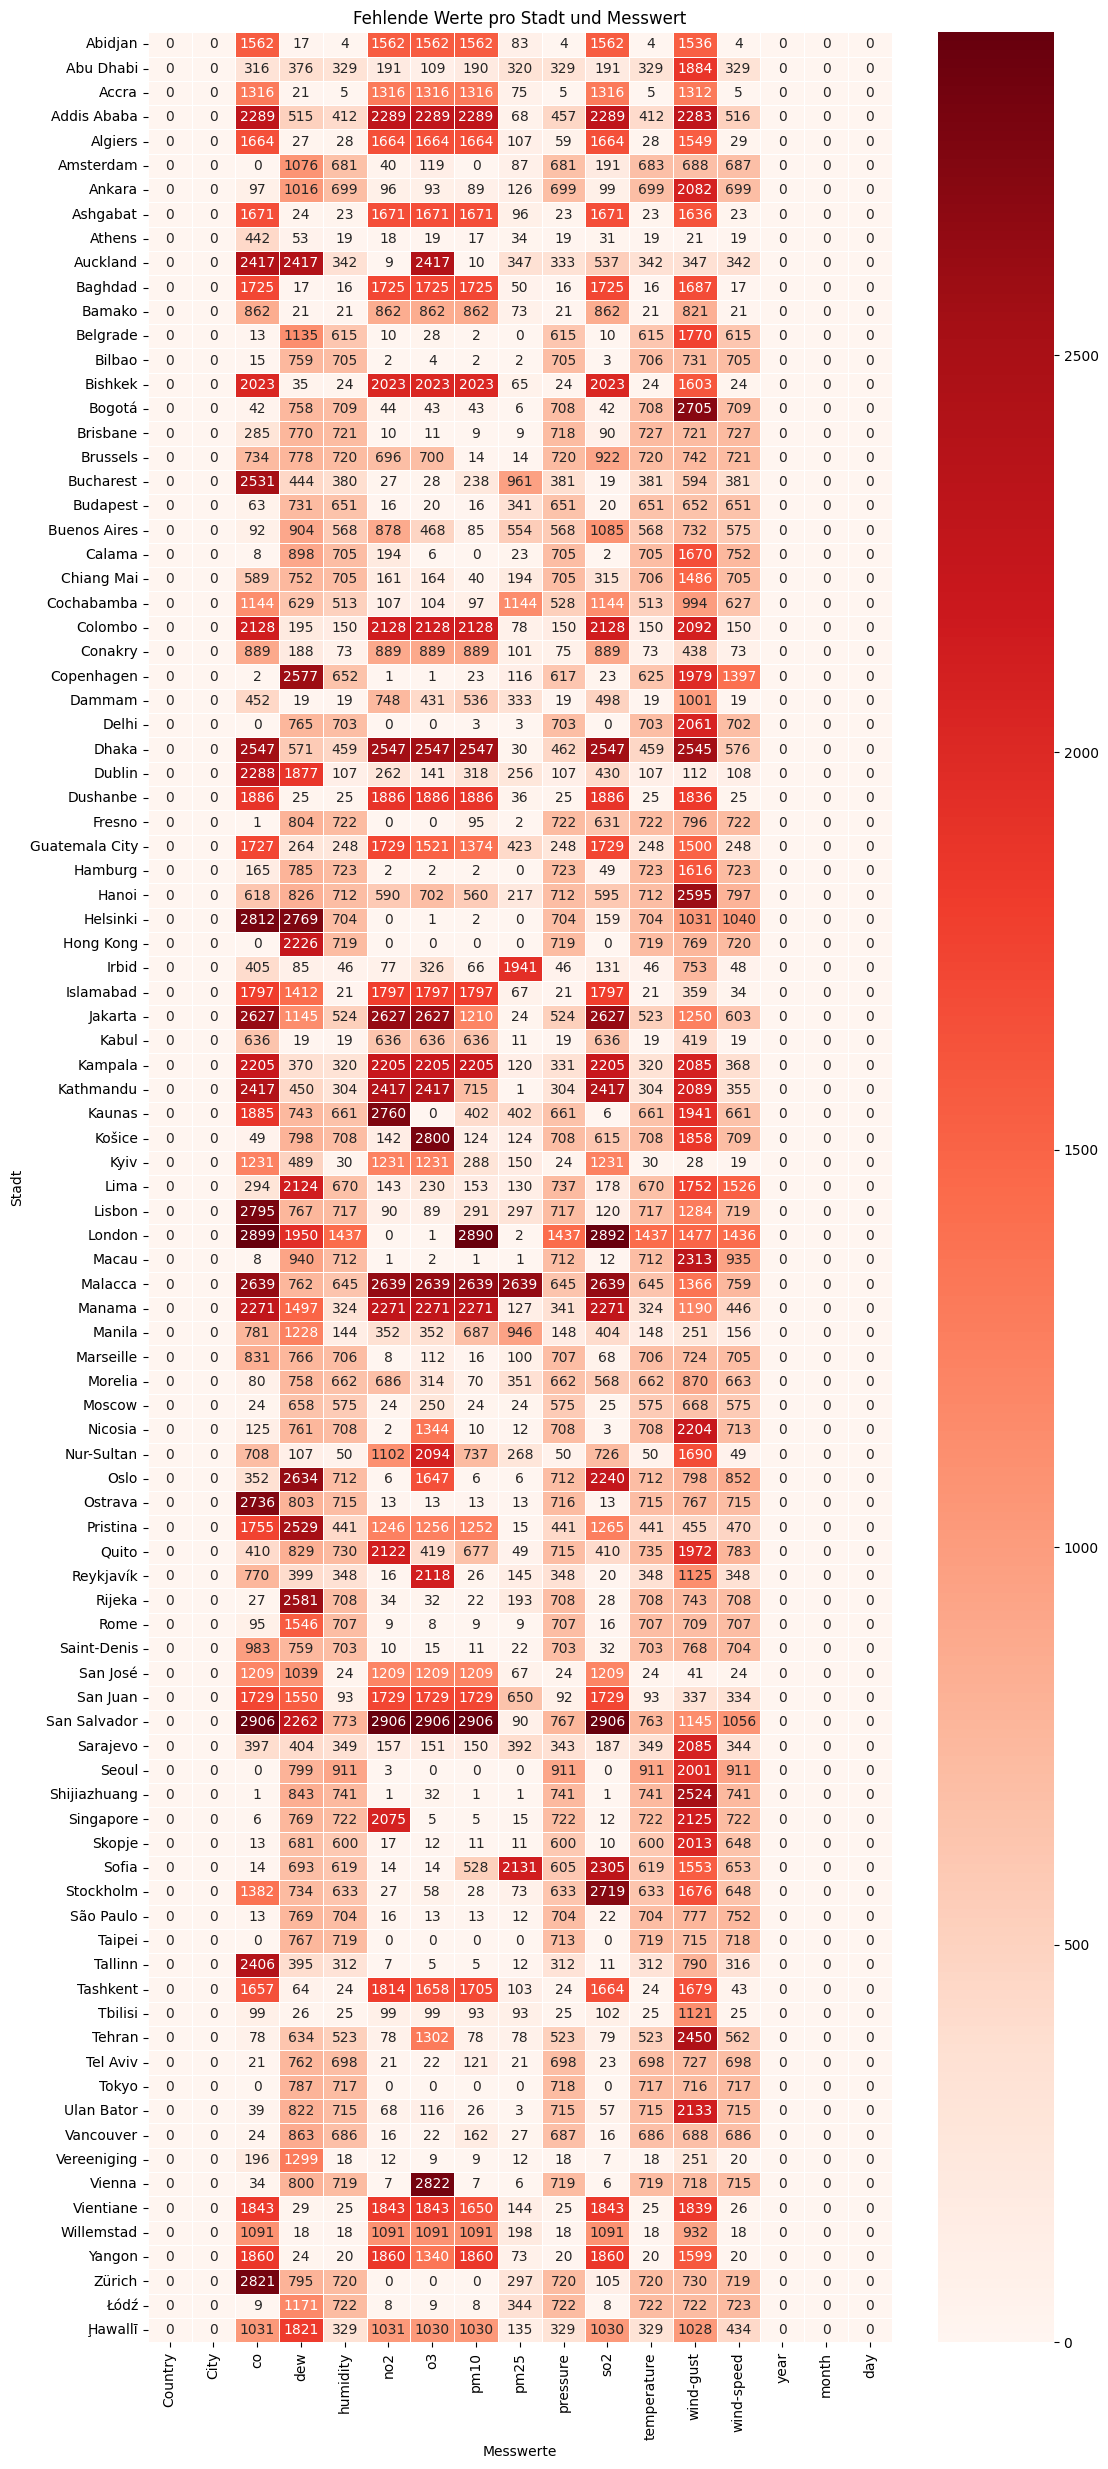

In [25]:
# Missing values by city, mit Heatmap

missing_by_city = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_by_city_percent = missing_by_city / len(df) * 100  # Prozentsatz der fehlenden Werte

missing_by_city_percent

plt.figure(figsize=(12, 30))
sns.heatmap(missing_by_city, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Fehlende Werte pro Stadt und Messwert")
plt.xlabel("Messwerte")
plt.ylabel("Stadt")
plt.xticks(rotation=90)
plt.show()


Idee: Vielleicht erst schauen, in welchen Städten es die meisten fehlenden Werte gibt und dann entscheiden, ob die Städte überhaupt mit in die Analyse einbezogen werden sollen. Vielleicht können wir viel mehr Zeilen erhalten, wenn wir einzelen Städte rauswerfen, die sehr wenig messen? Dann hätten wir weniger Städte, aber mehr Trainingsdaten für die Stäadte, die wir untersuchen wollen? Eigentlich mussten wir das ja schon gemacht haben, als wir nur die Städte mit den meisten Messwerte genommen haben. Aber vielleicht ist die Stadt mit den meisten Messwerten in einem bestimmten Land trotzdem eine Stadt mit wenigen Messwerten im Vergleich zu anderen Ländern?

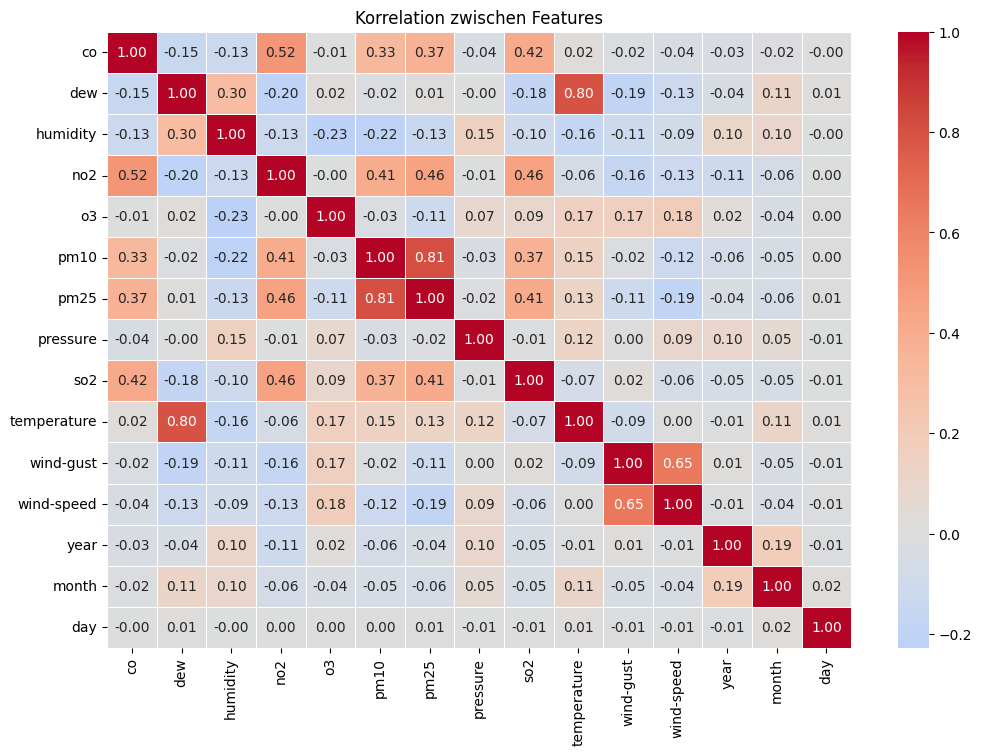

In [26]:
# Gibt es Korrelationen zwischen den Features (Collinearity)

# Heatmap: Wert über 0.8 = starke Korrelation
# Wert zwischen 0.5 und 0.8 = moderate Korrelation
# Wert unter 0.5 = schwache Korrelation

# Korrelationsmatrix berechnen
corr_matrix = df.select_dtypes(include=['number']).corr()

# Heatmap der Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Korrelation zwischen Features");


In [28]:
# Nur starke und moderate Korrelationen (>|0.5|) extrahieren, aber ohne die Hauptdiagonale (1.0)

# Korrelationsmatrix berechnen
corr_matrix = df.corr(numeric_only=True)

# Nur moderate und starke Korrelationen (>|0.5|) extrahieren, aber ohne die Hauptdiagonale (1.0)
strong_corrs = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix.abs() < 1.0)]

# DataFrame umwandeln, damit nur die relevanten Paare angezeigt werden
strong_corrs = strong_corrs.stack().reset_index()
strong_corrs.columns = ["Feature 1", "Feature 2", "Korrelation"]

# Doppelte Kombinationen entfernen (weil Korrelationen symmetrisch sind)
strong_corrs = strong_corrs.loc[strong_corrs["Feature 1"] < strong_corrs["Feature 2"]]

strong_corrs

,Feature 1,Feature 2,Korrelation
0,co,no2,0.52
1,dew,temperature,0.80
3,pm10,pm25,0.81
6,wind-gust,wind-speed,0.65


Text(0.5, 1.0, 'Zusammenhang zwischen Temperatur und Taupunkt')

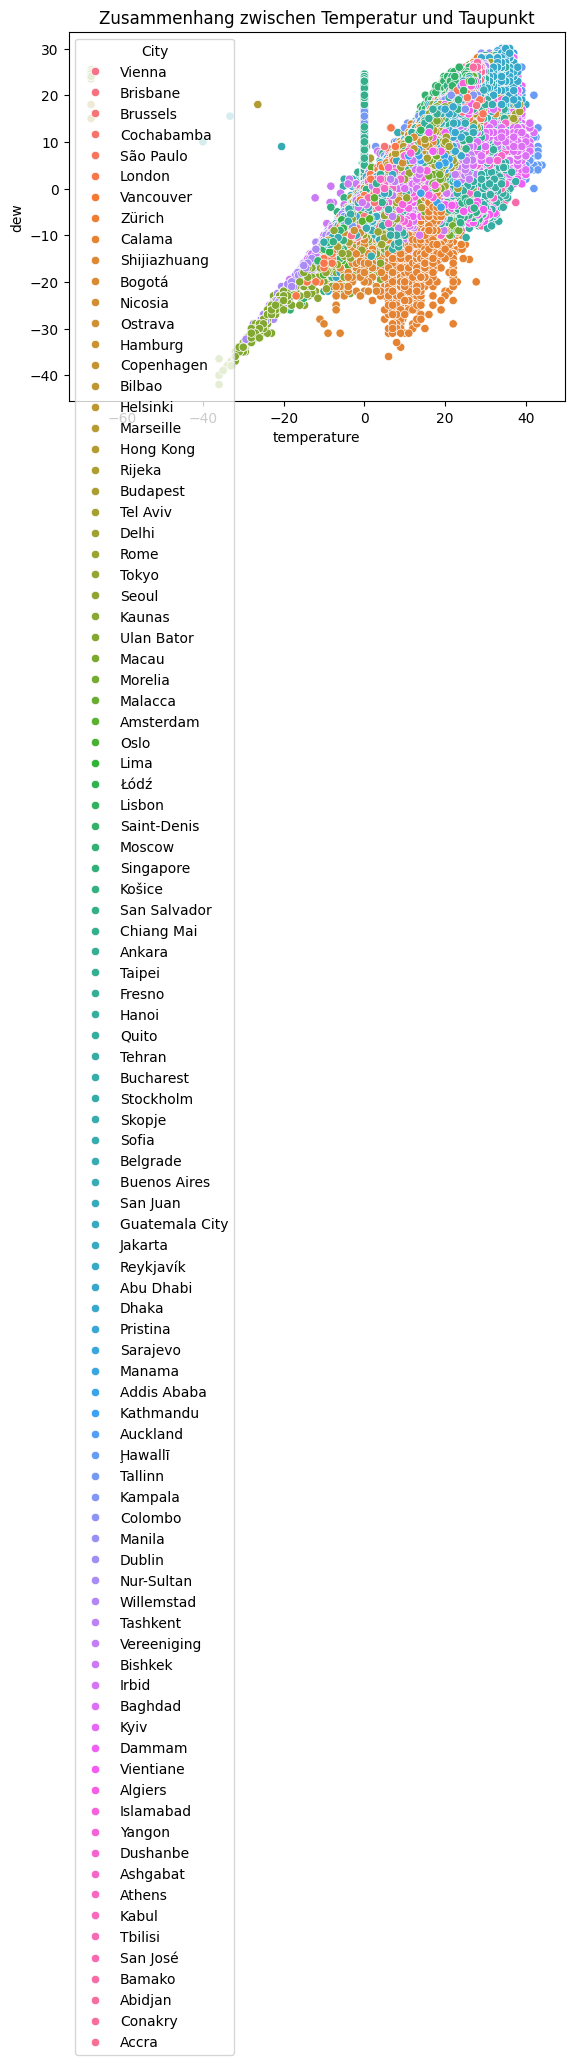

In [32]:

sns.scatterplot(data=df, x="temperature", y="dew", hue="City")
plt.title("Zusammenhang zwischen Temperatur und Taupunkt")
